In [1]:
import pandas as pd

In [2]:
import numpy  as np

In [4]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Insurance%20Premium.csv')

In [5]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,yes,south,16885
1,2,18,male,33.770,1,no,east,1726
2,3,28,male,33.000,3,no,east,4449
3,4,33,male,22.705,0,no,west,21984
4,5,32,male,28.880,0,no,west,3867


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Children  1338 non-null   int64  
 5   Smoker    1338 non-null   object 
 6   Region    1338 non-null   object 
 7   Premium   1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [8]:
df.describe()

,ID,Age,BMI,Children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.414798
std,386.391641,14.049960,6.098187,1.205493,12110.012882
min,1.000000,18.000000,15.960000,0.000000,1122.000000
25%,335.250000,27.000000,26.296250,0.000000,4740.000000
50%,669.500000,39.000000,30.400000,1.000000,9382.000000
75%,1003.750000,51.000000,34.693750,2.000000,16640.000000
max,1338.000000,64.000000,53.130000,5.000000,63770.000000


# Get Categories and Counts of categorical values

In [11]:
df[['Gender']].value_counts()

Gender
male      676
female    662
dtype: int64

In [12]:
df[['Smoker']].value_counts()

Smoker
no        1064
yes        274
dtype: int64

In [13]:
df[['Region']].value_counts()

Region
east      364
south     325
west      325
north     324
dtype: int64

In [14]:
df.columns

Index(['ID', 'Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region',
       'Premium'],
      dtype='object')

In [15]:
df.shape

(1338, 8)

# Encoding

In [18]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [19]:
df.replace({'Smoker':{'no':0,'yes':1}},inplace=True)

In [20]:
df.replace({'Region':{'north':0,'east':1,'south':2,'west':3}},inplace=True)

# Define X and Y

In [21]:
y=df['Premium']

In [22]:
y.shape

(1338,)

In [23]:
y

0       16885
1        1726
2        4449
3       21984
4        3867
        ...  
1333    10601
1334     2206
1335     1630
1336     2008
1337    29141
Name: Premium, Length: 1338, dtype: int64

In [25]:
x=df.drop(['ID','Premium'],axis=1)

In [27]:
x.shape

(1338, 6)

In [28]:
x

,Age,Gender,BMI,Children,Smoker,Region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,2


# Get X variable standardized

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()

In [31]:
x_std=df[['Age','BMI']]

In [32]:
x_std=ss.fit_transform(x_std)

In [35]:
x[['Age','BMI']]=pd.DataFrame(x_std,columns=['Age','BMI'])

In [36]:
x

,Age,Gender,BMI,Children,Smoker,Region
0,-1.438764,1,-0.453320,0,1,2
1,-1.509965,0,0.509621,1,0,1
2,-0.797954,0,0.383307,3,0,1
3,-0.441948,0,-1.305531,0,0,3
4,-0.513149,0,-0.292556,0,0,3
...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,3
1334,-1.509965,1,0.206139,0,0,0
1335,-1.509965,1,1.014878,0,0,1
1336,-1.296362,1,-0.797813,0,0,2


# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2529)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

# Model Train

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfr=RandomForestRegressor(random_state=2529)

In [42]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=2529)

# Model Prediction

In [43]:
y_pred=rfr.predict(x_test)

In [44]:
y_pred.shape

(268,)

In [45]:
y_pred

array([13371.68      ,  4288.26      ,  9032.84      ,  4040.25      ,
        5309.57      , 13991.25      , 14199.77      ,  3515.28      ,
       10323.48      ,  3450.04      , 33355.04      ,  1973.4       ,
       14429.98      ,  8165.4       , 25308.29      , 28548.37      ,
        8118.45      , 22036.37      , 13110.53      , 10997.54      ,
        7780.21      ,  7280.67      ,  4082.55533333,  6727.39      ,
        5870.86      , 19385.02      , 17158.38      , 31625.93      ,
       14601.78      , 39947.41      , 47052.06      ,  7406.08      ,
        5416.43      ,  4667.76      , 40909.74      , 10357.81      ,
       11359.43      , 35129.46      , 16852.98      ,  5414.25      ,
        5295.59      , 11274.92      , 45896.91      , 11521.96      ,
       15874.27      , 10828.95      , 16575.95      ,  9388.2       ,
        2149.41      , 48153.35      ,  1162.33      , 45791.92      ,
        3617.13      ,  4424.78      ,  5044.08      ,  9605.9       ,
      

# Model Evaluation

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [47]:
mean_squared_error(y_test,y_pred)

26155432.23178127

In [48]:
mean_absolute_error(y_test,y_pred)

2920.52977238806

In [49]:
r2_score(y_test,y_pred)

0.829765888008799

# Visualization of Actual vs Predicted Results 

In [50]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

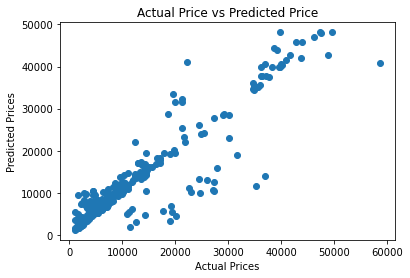

In [51]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show

# Future Predictions

In [52]:
x_new=np.array([-122516069,0,1.44959597,0,0,2])

In [53]:
x_new=x_new.reshape(-1,6)

In [54]:
x_new.shape

(1, 6)

In [55]:
y_pred_new=rfr.predict(x_new)

In [56]:
y_pred_new

array([1570.01])